# Граф

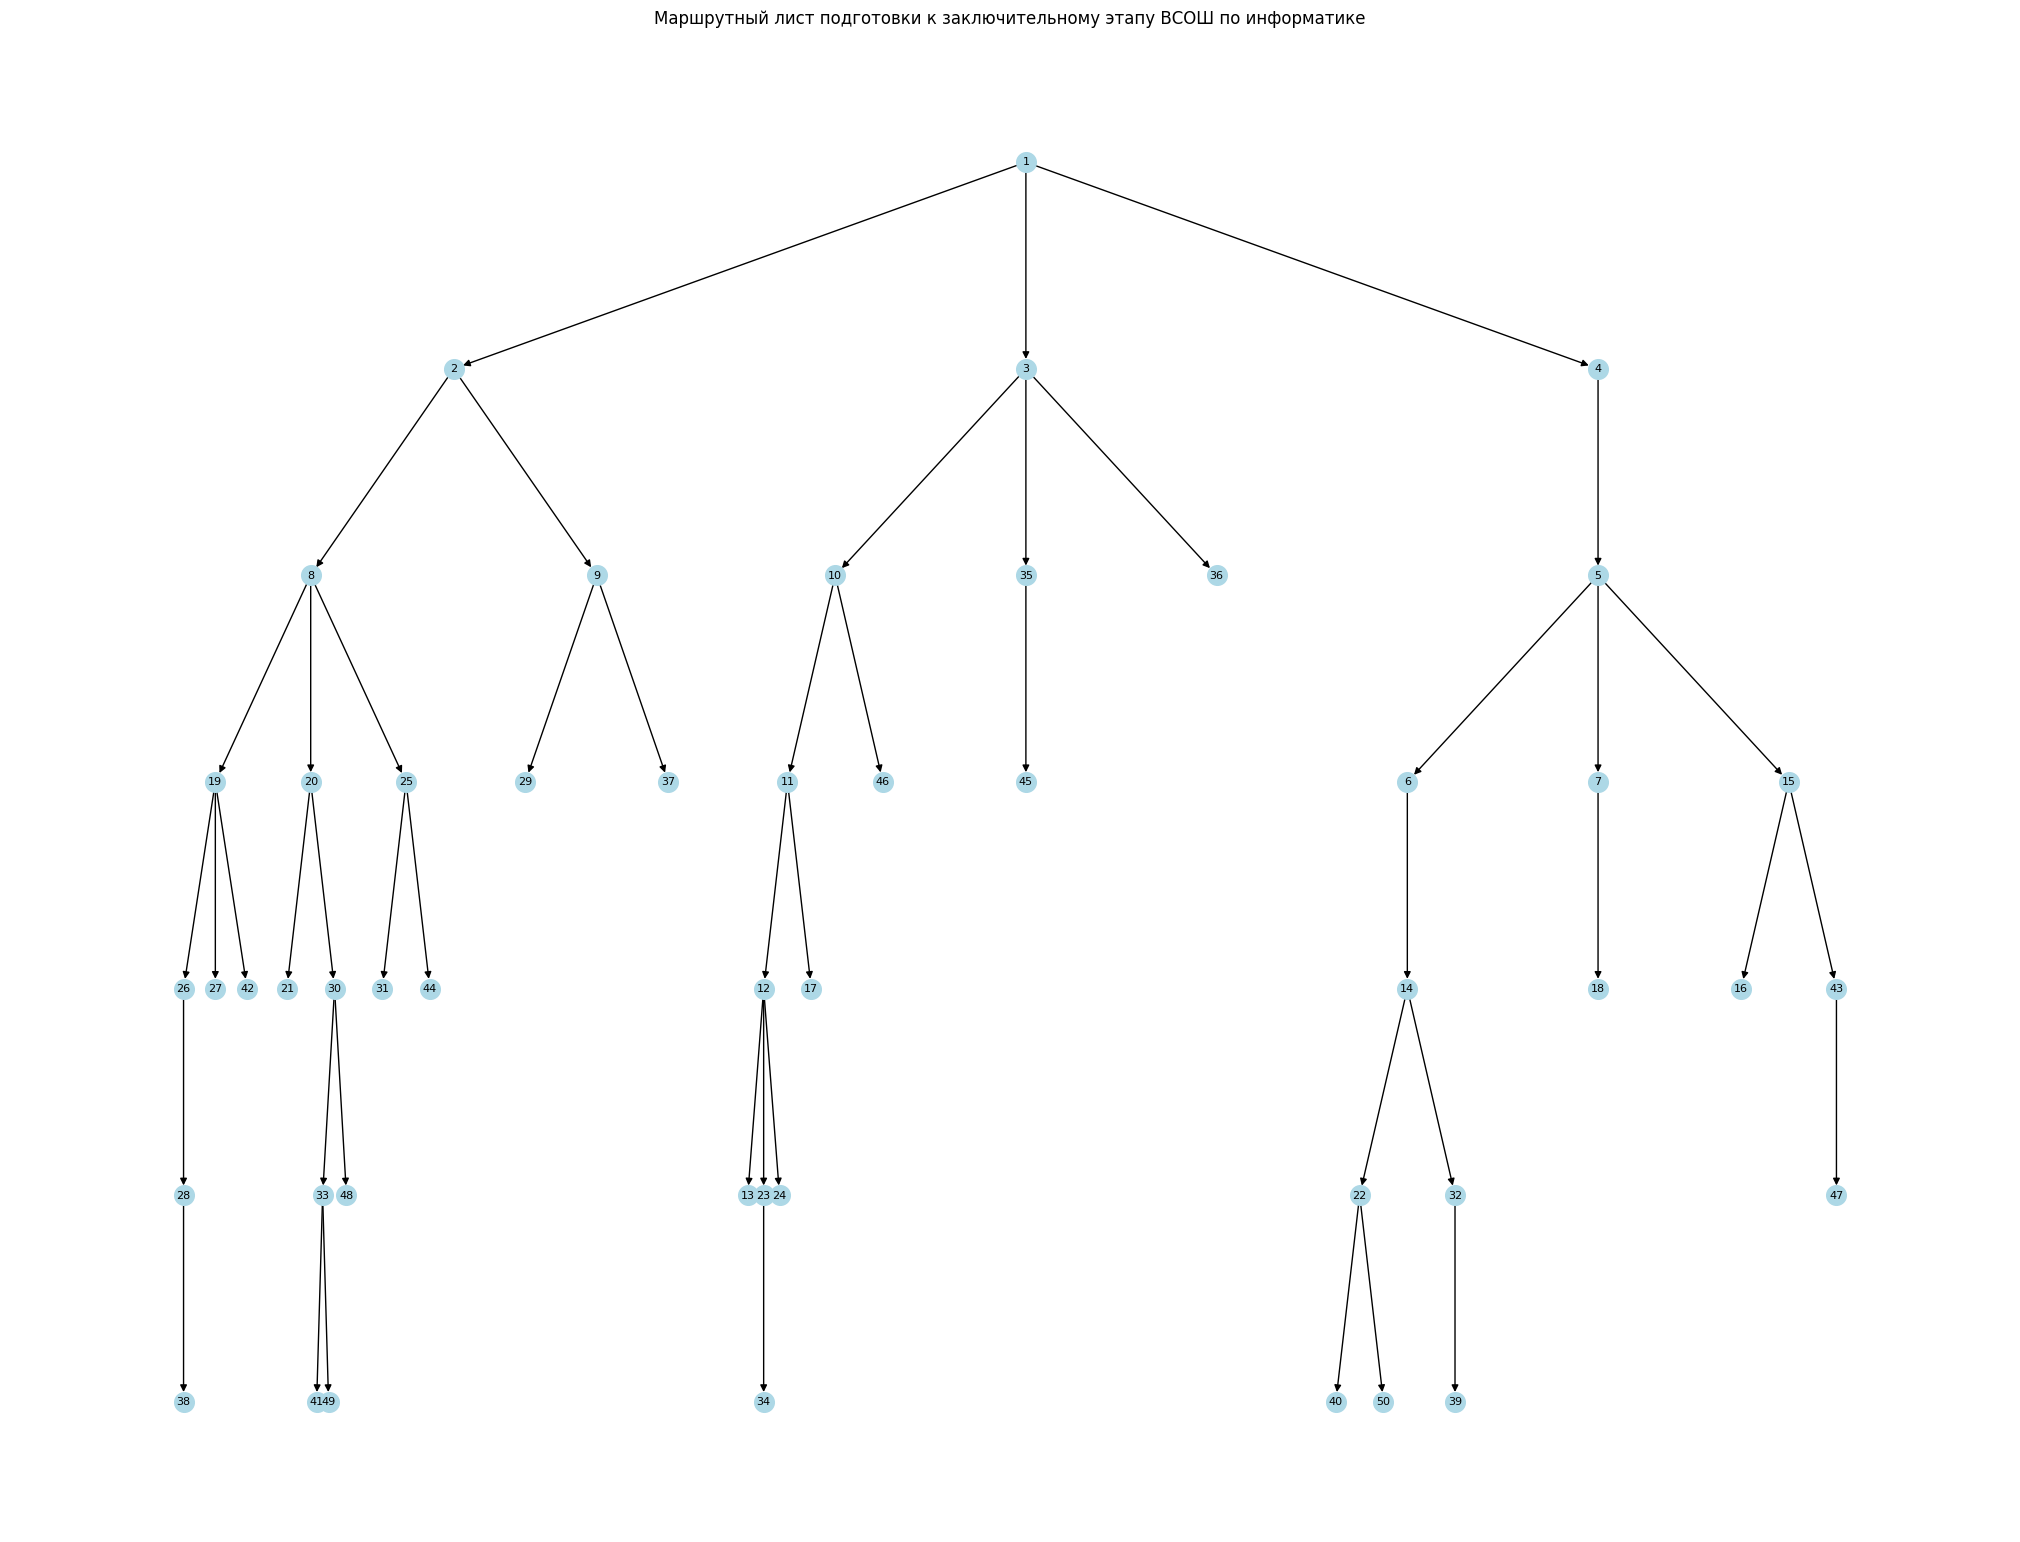

In [41]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Количество тем
N = 50  # Можно установить от 200 до 300

# Генерируем список названий тем
topics = [f"{i}" for i in range(1, N+1)]

# Инициализируем граф
G = nx.DiGraph()

# Добавляем корневой узел
G.add_node(topics[0])

# Создаем список детей для каждой темы, чтобы ограничить их количество
children_count = {topic: 0 for topic in topics}

# Строим дерево
for i in range(1, N):
    while True:
        parent = random.randint(0, i-1)
        if children_count[topics[parent]] < 3:  # Проверяем, не больше ли 3 детей у родителя
            G.add_edge(topics[parent], topics[i])
            children_count[topics[parent]] += 1
            break

# Функция для выполнения топологической сортировки (очередность изучения тем)
study_order = list(nx.topological_sort(G))

# Функция для генерации иерархической раскладки
def hierarchy_pos(G, root=None, width=3.0, vert_gap=0.6, vert_loc=0, xcenter=0.8):
    """
    Если граф является деревом, эта функция вернет позиции для построения иерархической раскладки.

    G: граф (должен быть деревом)
    root: корневой узел
    width: ширина пространства для данного уровня
    vert_gap: вертикальный промежуток между уровнями
    vert_loc: вертикальное положение корня
    xcenter: горизонтальное положение корня
    """
    if not nx.is_tree(G):
        raise TypeError('hierarchy_pos можно использовать только с деревьями')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  # Первый в топологическом порядке
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter, pos, parent):
        if pos is None:
            pos = {root: (xcenter, vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.successors(root))
        if parent is not None:
            if parent in children:
                children.remove(parent)
        if len(children) != 0:
            dx = width / len(children)
            nextx = xcenter - width / 2 - dx / 2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                     vert_loc=vert_loc - vert_gap, xcenter=nextx, pos=pos, parent=root)
        return pos

    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter, pos=None, parent=None)

# Рисуем граф
plt.figure(figsize=(20, 15))

# Увеличение ширины и вертикальных промежутков
pos = hierarchy_pos(G, root=topics[0], width=8.0, vert_gap=0.8)  # Увеличение ширины и вертикального зазора

nx.draw(G, pos, with_labels=True, arrows=True, node_size=200, node_color='lightblue', font_size=8)
plt.title("Маршрутный лист подготовки к заключительному этапу ВСОШ по информатике")
plt.show()

# Метрики графа

In [43]:
# Количество узлов и рёбер
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Количество узлов: {num_nodes}")
print(f"Количество рёбер: {num_edges}")

# Степени вершин
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
print("Степени входа (in-degree):", in_degrees)
print("Степени выхода (out-degree):", out_degrees)

# Средняя степень графа
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f"Средняя степень графа: {avg_degree}")

# Диаметр графа
if nx.is_strongly_connected(G):
    diameter = nx.diameter(G)
    print(f"Диаметр графа: {diameter}")
else:
    print("Граф не является сильно связанным, диаметр не определён.")

# Кратчайшие пути между всеми парами узлов
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
print("Кратчайшие пути между всеми узлами:", shortest_paths)

# Коэффициент кластеризации
clustering_coefficient = nx.average_clustering(G.to_undirected())
print(f"Средний коэффициент кластеризации: {clustering_coefficient}")

# Плотность графа
density = nx.density(G)
print(f"Плотность графа: {density}")

# Центральности
betweenness_centrality = nx.betweenness_centrality(G)
degree_centrality = nx.degree_centrality(G)
print("Центральность посредничества:", betweenness_centrality)
print("Степенная центральность:", degree_centrality)

Количество узлов: 50
Количество рёбер: 49
Степени входа (in-degree): {'1': 0, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '10': 1, '11': 1, '12': 1, '13': 1, '14': 1, '15': 1, '16': 1, '17': 1, '18': 1, '19': 1, '20': 1, '21': 1, '22': 1, '23': 1, '24': 1, '25': 1, '26': 1, '27': 1, '28': 1, '29': 1, '30': 1, '31': 1, '32': 1, '33': 1, '34': 1, '35': 1, '36': 1, '37': 1, '38': 1, '39': 1, '40': 1, '41': 1, '42': 1, '43': 1, '44': 1, '45': 1, '46': 1, '47': 1, '48': 1, '49': 1, '50': 1}
Степени выхода (out-degree): {'1': 3, '2': 2, '3': 3, '4': 1, '5': 3, '6': 1, '7': 1, '8': 3, '9': 2, '10': 2, '11': 2, '12': 3, '13': 0, '14': 2, '15': 2, '16': 0, '17': 0, '18': 0, '19': 3, '20': 2, '21': 0, '22': 2, '23': 1, '24': 0, '25': 2, '26': 1, '27': 0, '28': 1, '29': 0, '30': 2, '31': 0, '32': 1, '33': 2, '34': 0, '35': 1, '36': 0, '37': 0, '38': 0, '39': 0, '40': 0, '41': 0, '42': 0, '43': 1, '44': 0, '45': 0, '46': 0, '47': 0, '48': 0, '49': 0, '50': 0}
Средняя степень гр

Давайте подробно разберём, что каждая метрика означает, и что выведенные значения показывают:

### 1. **Количество узлов (Nodes)**:
   - **Количество узлов: 50**
     - Это число указывает на общее количество тем в графе (50 тем).

### 2. **Количество рёбер (Edges)**:
   - **Количество рёбер: 49**
     - Это количество связей между узлами (темами). В данном случае 49 рёбер означает, что каждая тема (кроме одной) связана хотя бы с одной другой темой, создавая иерархическую структуру.

### 3. **Степени входа (In-degree)**:
   - **Степени входа (in-degree): {'1': 0, '2': 1, ... '50': 1}**
     - **In-degree** для узла — это количество рёбер, входящих в этот узел. В графе почти все темы имеют **in-degree = 1**, что означает, что они зависят от одной другой темы. Исключение составляет **Тема 1** с **in-degree = 0**, которая является корневой и не зависит ни от какой другой темы.

### 4. **Степени выхода (Out-degree)**:
   - **Степени выхода (out-degree): {'1': 3, '2': 2, ... '50': 0}**
     - **Out-degree** — это количество рёбер, исходящих из узла (сколько тем зависят от данной темы). Например, **Тема 1** имеет **out-degree = 3**, что означает, что три темы зависят от неё. Узлы с **out-degree = 0** (например, **Тема 50**) — это конечные темы, из которых не выходит ни одного ребра (они не имеют последователей).

### 5. **Средняя степень графа (Average Degree)**:
   - **Средняя степень графа: 1.96**
     - Средняя степень рассчитывается как сумма всех степеней (in-degree + out-degree) разделённая на количество узлов. Это значение показывает, что в среднем каждый узел имеет почти 2 связи (входящих и исходящих рёбер). Это ожидаемо для дерева, где почти каждый узел связан с двумя другими (родителем и дочерним).

### 6. **Диаметр графа (Diameter)**:
   - **Граф не является сильно связанным, диаметр не определён**
     - Диаметр — это максимальная длина кратчайшего пути между двумя узлами в графе. Однако для его вычисления граф должен быть "сильно связанным", что означает, что из любого узла можно попасть в любой другой узел. В этом графе это условие не выполнено, поэтому диаметр не определён.

### 7. **Кратчайшие пути между всеми узлами (Shortest Path Lengths)**:
   - **Пример: {'1': {'1': 0, '2': 1, '3': 1, ...}}**
     - Эти данные показывают кратчайшие пути между всеми парами узлов. Например, из узла **1** в узел **2** путь составляет **1** шаг. Это полезно для понимания того, как темы связаны между собой и как далеко находятся темы друг от друга в графе.

### 8. **Средний коэффициент кластеризации (Clustering Coefficient)**:
   - **Средний коэффициент кластеризации: 0.0**
     - Коэффициент кластеризации показывает, насколько узлы имеют тенденцию образовывать замкнутые треугольники. Значение **0.0** означает, что таких треугольников в графе нет, что типично для деревьев, так как там отсутствуют циклы.

### 9. **Плотность графа (Graph Density)**:
   - **Плотность графа: 0.02**
     - Плотность показывает, насколько граф заполнен связями. Значение **0.02** означает, что из всех возможных рёбер графа присутствуют только 2% рёбер. Это также типично для деревьев, так как связи ограничены.

### 10. **Центральность посредничества (Betweenness Centrality)**:
   - **Центральность посредничества: {'1': 0.0, '2': 0.0085, ...}**
     - Центральность посредничества показывает, какие узлы находятся на путях между другими узлами. Узлы с высокой центральностью часто используются в маршрутах. Например, **Тема 2** имеет **центральность = 0.0085**, что означает, что она находится на пути между другими темами больше, чем другие узлы.

### 11. **Степенная центральность (Degree Centrality)**:
   - **Степенная центральность: {'1': 0.0612, '2': 0.0612, ...}**
     - Степенная центральность указывает на количество связей узла относительно общего числа узлов в графе. Например, **Тема 1** имеет **центральность 0.0612**, что означает, что она связана с 6.12% всех узлов в графе. Чем больше узел имеет связей, тем выше его центральность.

### Заключение:
Граф представляет собой дерево с 50 темами, где почти каждая тема зависит от одной другой темы, а многие темы зависят от нескольких предыдущих. Узлы с высокой степенной центральностью и центральностью посредничества играют ключевую роль в связи остальных тем. Плотность и коэффициент кластеризации низкие, что типично для иерархических структур.